## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# calling the dataset and reading the top five rows
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
# The number of rows in the dataset using shape method
num_rows = df.shape[0]
print("The number of rows in the dataset: {}".format(num_rows))

The number of rows in the dataset: 294478


c. The number of unique users in the dataset.

In [4]:
# using nunique method to get the number of unique users
num_unique = df.user_id.nunique()
print("The number of unique users in the dataset: {}".format(num_unique))

The number of unique users in the dataset: 290584


d. The proportion of users converted.

In [5]:
# calculating the proportion of users converted using mean method on converted column
prop_converted = df.converted.mean()
print("The proportion of users converted: {}".format(prop_converted))

The proportion of users converted: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# getting the mismatches of landing page and group columns by query method
mismatch = df.query("(landing_page == 'new_page' and group == 'control') or (landing_page == 'old_page' and group == 'treatment')")
print("The number of times the new_page and treatment don't match: {}".format(mismatch.shape[0]))

The number of times the new_page and treatment don't match: 3893


f. Do any of the rows have missing values?

In [7]:
# getting the number of missing values using the methods: isnull, and sum twice
num_null = df.isnull().sum().sum()
print("The number of missing values: {}".format(num_null))

The number of missing values: 0


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# getting the indices of mismatch rows using index method
mismatch_ind = mismatch.index
# deleting the mismatch rows using drop method
df2 = df.drop(index=mismatch_ind)
# resetting the indices using reset index method
df2 = df2.reset_index(drop=True)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# getting the number of unique ids using nunique method
num_unique2 = df2.user_id.nunique()
print("The number of unique user_ids are in df2: {}".format(num_unique2))

The number of unique user_ids are in df2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# getting the duplicated user id using duplicated method and index method
dup_user_id = df2[df2.user_id.duplicated()].user_id.index[0]
print("The user_id repeated in df2: {}".format(dup_user_id))

The user_id repeated in df2: 2862


c. What is the row information for the repeat **user_id**? 

In [12]:
# getting the information for the repeat user id using boolean expression for duplicated method
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# removing one of the duplicated user id using drop_duplicates method
df2 = df2.drop_duplicates()
# resetting the indices using reset index method
df2 = df2.reset_index(drop=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
print("The probability of an individual converting regardless of the page they receive: {}".format(prop_converted))

The probability of an individual converting regardless of the page they receive: 0.11965919355605512


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# getting the control group using query method
control = df2.query("group == 'control'")
# getting the number of individuals in control group using shape method
num_control = control.shape[0]
# getting the number of individuals in control group that converted using shape method and query method
num_control_converted = control.query("converted == 1").shape[0]
# calculating the proportion of the individuals converted in control group
prop_control_converted = num_control_converted / num_control
print("The probability they converted given that an individual was in the control group: {}".format(prop_control_converted))

The probability they converted given that an individual was in the control group: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# getting the treatment group using query method
treatment = df2.query("group == 'treatment'")
# getting the number of individuals in treatment group using shape method
num_treatment = treatment.shape[0]
# getting the number of individuals in treatment group that converted using shape method and query method
num_treatment_converted = treatment.query("converted == 1").shape[0]
# calculating the proportion of the individuals converted in treatment group
prop_treatment_converted = num_treatment_converted / num_treatment
print("The probability they converted given that an individual was in the treatment group: {}".format(prop_treatment_converted))

The probability they converted given that an individual was in the treatment group: 0.11880724790277405


d. What is the probability that an individual received the new page?

In [17]:
# getting the number of rows in the dataset using shape method
num_rows2 = df2.shape[0]
# getting the number of individuals that are in the new page using methods: query and shape
new_page = df2.query("landing_page == 'new_page'").shape[0]
# calculating the proportion of individuals that are in the new page
prop_new_page = new_page / num_rows2
print("The probability that an individual received the new page: {}".format(prop_new_page))

The probability that an individual received the new page: 0.5000636646764286


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**I found that about half of the individuals received the new page and about 11.88% of them converted to the new page. However, the other half of the individuals received the old page, about 12.04% of them converted to the new page. I concluded from these statistics that there is not sufficient evidence to conclude that the new treatment page leads to more conversions.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_0$:$p_{new}$ - $p_{old}$ <= 0**

**$H_1$:$p_{new}$ - $p_{old}$ > 0**

**The converted rates for the old page: 12.04% and for the new page: 11.88%**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# calculating the conversion rate for the individuals that are on the new page under the null
new_page_converted = prop_converted
print("The conversion rate for p_new under the null: {}".format(new_page_converted))

The conversion rate for p_new under the null: 0.11965919355605512


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
# calculating the conversion rate for the individuals that are on the old page under the null
old_page_converted = prop_converted
print("The conversion rate for p_old under the null: {}".format(old_page_converted))

The conversion rate for p_old under the null: 0.11965919355605512


c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new = num_treatment
print("The number of individuals in the treatment group: {}".format(num_treatment))

The number of individuals in the treatment group: 145311


d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old = num_control
print("The number of individuals in the control group: {}".format(num_control))

The number of individuals in the control group: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
# getting the same sample every time the code run using random.seed method
np.random.seed(42)
# getting a sample of 200 from the individuals that are on the new page
new_page_converted = treatment.sample(200)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
# getting the same sample every time the code run using random.seed method
np.random.seed(42)
# getting a sample of 200 from the individuals that are on the new page
old_page_converted = control.sample(200)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
# calculating the proportion of the individuals that are on the new page that are converted
p_new = new_page_converted.converted.mean()
# calculating the proportion of the individuals that are on the old page that are converted
p_old = old_page_converted.converted.mean()
print("p_new - p_old: {}".format(p_new - p_old))

p_new - p_old: 0.05499999999999999


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
# getting 10000 samples of the proportions of size 200 from the original sample of the treatment group that converted
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
# getting 10000 samples of the proportions of size 200 from the original sample of the control group that converted
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
# getting an array of the differences between the proportions of the treatment group converted and the control group converted
p_diffs = new_converted_simulation - old_converted_simulation
new_converted_simulation, old_converted_simulation

(array([ 0.15521192,  0.1534846 ,  0.15595516, ...,  0.15648506,
         0.15492289,  0.15258996]),
 array([ 0.09922629,  0.09937084,  0.09944656, ...,  0.10047221,
         0.09929513,  0.09983893]))

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

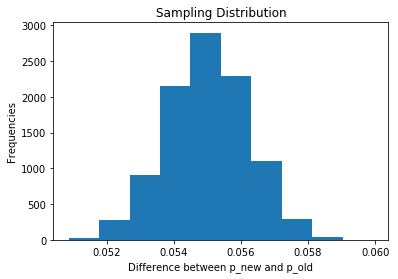

In [26]:
# plotting a histogram for p_diffs using plt.hist method
plt.hist(p_diffs)
# adding a label for x-axis using plt.xlabel method
plt.xlabel("Difference between p_new and p_old")
# adding a label for y-axis using plt.ylabel method
plt.ylabel("Frequencies")
# adding a title for the plot using plt.title method
plt.title("Sampling Distribution");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
# calculating the proportion of values that are greater than the actual difference observed in ab_data.csv using the boolean expressions and mean method
(p_diffs > (prop_treatment_converted - prop_control_converted)).mean()

1.0

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**That value is called confidence interval. It means that there is more than 95% that there is a difference between the new and old pages and that difference is in favor of the new page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm
# calculating the number of individuals that are on the old page and converted
convert_old = num_control_converted
# calculating the number of individuals that are on the new page and converted
convert_new = num_treatment_converted
# calculating the number of individuals that are on the old page
n_old = num_control
# calculating the number of individuals that are on the new page
n_new = num_treatment

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [29]:
# getting z-score and p-value using stats.proportions_ztest method
sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])

(1.3116075339133115, 0.18965258971881804)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Z-score: 1.31, p-value: 0.19. I think they don't agree with the findings in parts j and k because in the findings I found that I have a confidence interval of about 96% that there is a difference between $p_{new}$ and $p_{old}$ and it is in favor of $p_{new}$.However, I concluded from the p-value that I failed to reject the null hypothesis because p-value is higher than $\alpha$ which means that the new page doesn't increase the conversion rate.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression: because the values of the target variable is either 0 or 1 which means that 0 is for no conversion and 1 is conversion so we conclude that the variable is categorical.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
# adding an intercept column
df2['intercept'] = 1
# creating a dummy variable column for which page each user received using pd.get_dummies method
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [37]:
# Creating a regression model using sm.Logit method
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
# fitting the model using logit_mod.fit method
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
# getting the summary of the model using summary2 method
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-21 02:38 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**The p-value associated with ab_page: 0.1897 which is approximately: 0.19. It's the same as from the value I found in Part II which is approximately: 0.19**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea to consider other factors add into your regression model because the p-value of ab_page column from the model which is: 0.9392 means that this column isn't stastistically significant which means that the conversion rate doesn't depend on what is the page that a user is on. And the evidence is from the original dataset. From it, we have a conversion rate of 12.04% for the old page and 11.88% for the new page and the difference between them is approximately 0 so it doesn't matter that a user is on the old page or the new page. For adding additional terms into my regression model, I think that there aren't any disadvantages for it. I think that there will be advantages of it because I want to know that if other factors affect on the model rather than ab_page column.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [33]:
# getting the dataframe of countries using pd.read_csv method
df_countries = pd.read_csv("countries.csv")
# joining the countries dataframe with df2 using join and set_index methods
total_df = df2.join(df_countries.set_index('user_id'), on='user_id', how='inner')
# resetting indices of the new dataframe using reset_index method
total_df = total_df.reset_index(drop=True)
# creating dummy variables for the countries using pd.get_dummies method
total_df[['CA', 'UK', 'US']] = pd.get_dummies(total_df['country'])
# creating a regression model using sm.Logit method
logit_mod2 = sm.Logit(total_df['converted'], total_df[['intercept', 'CA', 'UK']])
# fitting the model using logit_mod.fit method
results2 = logit_mod2.fit()
# getting the summary of the model using summary2 method
results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-21 02:29 AIC:              212781.0880
No. Observations:   290585           BIC:              212812.8269
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3154  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5176  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7462  0.4555  -0.0161   0.0360
==================================================================

"""

**In the second model, I selected US country as a baseline. Here the p-value for the countries CA and UK are 0.1291 and 0.4556 respectively. The p-values for the two countries are greater than $\alpha$, then I concluded that the countries are not statistically significant, which means that the conversion rate doesn't depend on the country that a user is from.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [34]:
# creating an interaction between the countries and page columns
total_df['CA & ab_page'] = total_df['ab_page'] * total_df['CA']
total_df['UK & ab_page'] = total_df['ab_page'] * total_df['UK']
# creating a regression model using sm.Logit method
logit_mod3 = sm.Logit(total_df['converted'], total_df[['intercept', 'ab_page', 'CA', 'UK', 'CA & ab_page', 'UK & ab_page']])
# fitting the model using logit_mod.fit method
results3 = logit_mod3.fit()
# getting the summary of the model using summary2 method
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-21 02:29 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -1.9865   0.0096 -206.3440 0.0000 -2.0053 -1.9676
ab_page          -0.0206   0.0137   -1.5060 0.1321 -0.0474  0.0062
CA               -0.0175   0.0377   -0.4652 0.6418 -0.0914  0.0563
UK               -0.0057   0.0188   -0.3057 0.7598 -0.0426  0.0311
CA & ab_page     -0.0469   0.0538   -0.8716 0.3834 -0.1523  0.0585
UK & ab_page      0.0314   0.0266    1.1811 0.2375 -0.0207  0.0835
==================================================================

"""

### Conclusions
**p-values of CA & ab_page and UK & ab_page are: 0.7104 and 0.8957 respectively and they are greater than $\alpha$ which means that the interaction between countries and the landing page is not statistically significant. I concluded that no factors affect on the conversion rate which means that the conversion rate doesn't depend on the countries nor the landing page.**

In [35]:
# from subprocess import call
# call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])